In [1]:
# 1. 加载IMDB数据集：
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


In [2]:
train_data.shape

(25000,)

In [3]:
print(train_data[24999])

[1, 17, 6, 194, 337, 7, 4, 204, 22, 45, 254, 8, 106, 14, 123, 4, 2, 270, 2, 5, 2, 2, 732, 2098, 101, 405, 39, 14, 1034, 4, 1310, 9, 115, 50, 305, 12, 47, 4, 168, 5, 235, 7, 38, 111, 699, 102, 7, 4, 4039, 9245, 9, 24, 6, 78, 1099, 17, 2345, 2, 21, 27, 9685, 6139, 5, 2, 1603, 92, 1183, 4, 1310, 7, 4, 204, 42, 97, 90, 35, 221, 109, 29, 127, 27, 118, 8, 97, 12, 157, 21, 6789, 2, 9, 6, 66, 78, 1099, 4, 631, 1191, 5, 2642, 272, 191, 1070, 6, 7585, 8, 2197, 2, 2, 544, 5, 383, 1271, 848, 1468, 2, 497, 2, 8, 1597, 8778, 2, 21, 60, 27, 239, 9, 43, 8368, 209, 405, 10, 10, 12, 764, 40, 4, 248, 20, 12, 16, 5, 174, 1791, 72, 7, 51, 6, 1739, 22, 4, 204, 131, 9]


In [4]:
train_labels.shape

(25000,)

In [5]:
print(train_labels[24999])

0


In [6]:
# 2. 准备数据：

# 将整数索引序列解码成单词序列：
word_index = imdb.get_word_index()  # key is word, value is numeric index
index_word = {i: w for w, i in word_index.items()}
decoded_review = ' '.join(index_word.get(i - 3, '?') for i in train_data[24999])

In [7]:
print(decoded_review)

? as a big fan of the original film it's hard to watch this show the ? set ? and ? ? sets rob any style from this remake the mood is never there instead it has the look and feel of so many television movies of the seventies crenna is not a bad choice as walter ? but his snappy wardrobe and ? apartment don't fit the mood of the original or make him an interesting character he does his best to make it work but samantha ? is a really bad choice the english accent and california looks can't hold a candle to barbara ? ? voice and sex appeal lee j ? tries ? to fashion barton ? but even his performance is just gruff without style br br it feels like the tv movie it was and again reminds me of what a remarkable film the original still is


In [8]:
# 对评论数据进行one-hot编码：
import numpy as np

def one_hot_encode(docs, dim):
    docs_encoded = np.zeros((len(docs), dim), dtype='float16')
    for i, doc in enumerate(docs):
        docs_encoded[i, doc] = 1.
    return docs_encoded
    
x_train = one_hot_encode(train_data, dim=10000)
x_test = one_hot_encode(test_data, dim=10000)

y_train = np.asarray(train_labels).astype('float16')
y_test = np.asarray(test_labels).astype('float16')

print(x_train.shape)

(25000, 10000)


In [9]:
# 3. 构建网络：

# 将要构建一个具有10000个输入，每层16个神经元、每个神经元以ReLU作为激活函数的隐藏层，
# 以及一个sigmoid作为激活函数的输出层：
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

W0428 19:26:01.377920 23300 deprecation_wrapper.py:119] From G:\Python\fakeras\venv\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



W0428 19:26:02.047919 23300 deprecation_wrapper.py:119] From G:\Python\fakeras\venv\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.



W0428 19:26:02.165920 23300 deprecation_wrapper.py:119] From G:\Python\fakeras\venv\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [10]:
# 4. 编译模型，即选择损失函数、优化器以及监控指标：

from keras import losses, metrics, optimizers

# 如果需要配置自定义的优化器的参数，或者传入自定义的损失函数或治标函数，
# 可以使用如下的写法：
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

# 简写的话，如下：
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

W0428 19:26:03.637239 23300 deprecation_wrapper.py:119] From G:\Python\fakeras\venv\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



W0428 19:26:03.643238 23300 deprecation_wrapper.py:119] From G:\Python\fakeras\venv\lib\site-packages\keras\backend\tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.



W0428 19:26:03.650237 23300 deprecation.py:323] From G:\Python\fakeras\venv\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [11]:
# 5. 留出验证集：
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [12]:
# 6. 训练模型：

# 现在使用512个样本组成的小批量，将模型训练20个epochs。与此同时，还要监控验证集
# 的损失和精度：
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

W0428 19:26:07.264253 23300 deprecation_wrapper.py:119] From G:\Python\fakeras\venv\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 15000 samples, validate on 10000 samples
Epoch 1/20


  512/15000 [>.............................] - ETA: 50s - loss: 0.6939 - acc: 0.5020

 1536/15000 [==>...........................] - ETA: 16s - loss: 0.6847 - acc: 0.5488

 2560/15000 [====>.........................] - ETA: 9s - loss: 0.6626 - acc: 0.6258 

 3584/15000 [======>.......................] - ETA: 6s - loss: 0.6394 - acc: 0.6749

 4608/15000 [========>.....................] - ETA: 4s - loss: 0.6164 - acc: 0.7075

 5632/15000 [==========>...................] - ETA: 3s - loss: 0.6035 - acc: 0.7102

 6656/15000 [============>.................] - ETA: 2s - loss: 0.5897 - acc: 0.7227

 7680/15000 [==============>...............] - ETA: 2s - loss: 0.5720 - acc: 0.7415

 8704/15000 [================>.............] - ETA: 1s - loss: 0.5590 - acc: 0.7522

 9728/15000 [==================>...........] - ETA: 1s - loss: 0.5476 - acc: 0.7627

10752/15000 [====================>.........] - ETA: 1s - loss: 0.5360 - acc: 0.7728

11776/15000 [======================>.......] - ETA: 0s - loss: 0.5258 - acc: 0.7788

12800/15000 [========================>.....] - ETA: 0s - loss: 0.5167 - acc: 0.7841

13824/15000 [==========================>...] - ETA: 0s - loss: 0.5078 - acc: 0.7889

14848/15000 [============================>.] - ETA: 0s - loss: 0.4991 - acc: 0.7942

15000/15000 [==============================] - 3s 231us/step - loss: 0.4976 - acc: 0.7953 - val_loss: 0.3717 - val_acc: 0.8722


Epoch 2/20
  512/15000 [>.............................] - ETA: 0s - loss: 0.3127 - acc: 0.9023

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.3223 - acc: 0.9095

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.3127 - acc: 0.9125

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.3085 - acc: 0.9143

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.3031 - acc: 0.9149

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.3011 - acc: 0.9142

 6656/15000 [============>.................] - ETA: 0s - loss: 0.3018 - acc: 0.9102

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.3067 - acc: 0.9051

 8704/15000 [================>.............] - ETA: 0s - loss: 0.3056 - acc: 0.9044

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.3040 - acc: 0.9046

10752/15000 [====================>.........] - ETA: 0s - loss: 0.3027 - acc: 0.9063

11776/15000 [======================>.......] - ETA: 0s - loss: 0.3011 - acc: 0.9062

12800/15000 [========================>.....] - ETA: 0s - loss: 0.2990 - acc: 0.9048

13824/15000 [==========================>...] - ETA: 0s - loss: 0.2980 - acc: 0.9036

14848/15000 [============================>.] - ETA: 0s - loss: 0.2960 - acc: 0.9044

15000/15000 [==============================] - 2s 112us/step - loss: 0.2957 - acc: 0.9046 - val_loss: 0.2990 - val_acc: 0.8910


Epoch 3/20
  512/15000 [>.............................] - ETA: 0s - loss: 0.2083 - acc: 0.9355

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.2208 - acc: 0.9323



 2560/15000 [====>.........................] - ETA: 0s - loss: 0.2171 - acc: 0.9352

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.2228 - acc: 0.9291



 4608/15000 [========>.....................] - ETA: 0s - loss: 0.2197 - acc: 0.9314

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.2216 - acc: 0.9306

 6656/15000 [============>.................] - ETA: 0s - loss: 0.2189 - acc: 0.9307

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.2201 - acc: 0.9299

 8704/15000 [================>.............] - ETA: 0s - loss: 0.2208 - acc: 0.9274

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.2199 - acc: 0.9279



10752/15000 [====================>.........] - ETA: 0s - loss: 0.2185 - acc: 0.9281

11776/15000 [======================>.......] - ETA: 0s - loss: 0.2182 - acc: 0.9279

12800/15000 [========================>.....] - ETA: 0s - loss: 0.2181 - acc: 0.9274



13824/15000 [==========================>...] - ETA: 0s - loss: 0.2163 - acc: 0.9284



14848/15000 [============================>.] - ETA: 0s - loss: 0.2161 - acc: 0.9288

15000/15000 [==============================] - 2s 100us/step - loss: 0.2160 - acc: 0.9286 - val_loss: 0.3088 - val_acc: 0.8713


Epoch 4/20
  512/15000 [>.............................] - ETA: 0s - loss: 0.1928 - acc: 0.9453

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.1877 - acc: 0.9395



 2560/15000 [====>.........................] - ETA: 0s - loss: 0.1839 - acc: 0.9434

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.1750 - acc: 0.9487

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.1744 - acc: 0.9494



 5632/15000 [==========>...................] - ETA: 0s - loss: 0.1762 - acc: 0.9469



 6656/15000 [============>.................] - ETA: 0s - loss: 0.1742 - acc: 0.9473

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.1731 - acc: 0.9478

 8704/15000 [================>.............] - ETA: 0s - loss: 0.1716 - acc: 0.9477

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1707 - acc: 0.9479



10752/15000 [====================>.........] - ETA: 0s - loss: 0.1725 - acc: 0.9466



11776/15000 [======================>.......] - ETA: 0s - loss: 0.1737 - acc: 0.9449

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1760 - acc: 0.9430

13824/15000 [==========================>...] - ETA: 0s - loss: 0.1755 - acc: 0.9431

14848/15000 [============================>.] - ETA: 0s - loss: 0.1744 - acc: 0.9432

15000/15000 [==============================] - 2s 101us/step - loss: 0.1742 - acc: 0.9433 - val_loss: 0.2830 - val_acc: 0.8839


Epoch 5/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.1283 - acc: 0.9727

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.1414 - acc: 0.9629

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.1361 - acc: 0.9641

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.1342 - acc: 0.9657

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.1336 - acc: 0.9646

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.1347 - acc: 0.9632

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1399 - acc: 0.9593



 7680/15000 [==============>...............] - ETA: 0s - loss: 0.1400 - acc: 0.9582

 8704/15000 [================>.............] - ETA: 0s - loss: 0.1383 - acc: 0.9581

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1381 - acc: 0.9582

10752/15000 [====================>.........] - ETA: 0s - loss: 0.1394 - acc: 0.9567

11776/15000 [======================>.......] - ETA: 0s - loss: 0.1399 - acc: 0.9562

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1400 - acc: 0.9553

13824/15000 [==========================>...] - ETA: 0s - loss: 0.1416 - acc: 0.9542

14848/15000 [============================>.] - ETA: 0s - loss: 0.1412 - acc: 0.9542

15000/15000 [==============================] - 2s 101us/step - loss: 0.1415 - acc: 0.9543 - val_loss: 0.2863 - val_acc: 0.8851


Epoch 6/20
  512/15000 [>.............................] - ETA: 0s - loss: 0.1241 - acc: 0.9668

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.1150 - acc: 0.9681

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.1046 - acc: 0.9715

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.1059 - acc: 0.9707

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.1116 - acc: 0.9692

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.1146 - acc: 0.9668

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1145 - acc: 0.9666

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.1154 - acc: 0.9656



 8704/15000 [================>.............] - ETA: 0s - loss: 0.1153 - acc: 0.9648

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1146 - acc: 0.9650

10752/15000 [====================>.........] - ETA: 0s - loss: 0.1145 - acc: 0.9651

11776/15000 [======================>.......] - ETA: 0s - loss: 0.1138 - acc: 0.9650

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1142 - acc: 0.9651

13824/15000 [==========================>...] - ETA: 0s - loss: 0.1147 - acc: 0.9649

14848/15000 [============================>.] - ETA: 0s - loss: 0.1141 - acc: 0.9653

15000/15000 [==============================] - 2s 101us/step - loss: 0.1143 - acc: 0.9653 - val_loss: 0.3086 - val_acc: 0.8809


Epoch 7/20
  512/15000 [>.............................] - ETA: 0s - loss: 0.0955 - acc: 0.9727

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.0956 - acc: 0.9714



 2560/15000 [====>.........................] - ETA: 0s - loss: 0.0933 - acc: 0.9746

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.0929 - acc: 0.9741

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0911 - acc: 0.9757



 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0904 - acc: 0.9759

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0918 - acc: 0.9746

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0938 - acc: 0.9736

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0948 - acc: 0.9724



 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0961 - acc: 0.9720

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0965 - acc: 0.9717

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0966 - acc: 0.9710

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0966 - acc: 0.9709

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0972 - acc: 0.9706

14848/15000 [============================>.] - ETA: 0s - loss: 0.0971 - acc: 0.9708

15000/15000 [==============================] - 2s 101us/step - loss: 0.0970 - acc: 0.9709 - val_loss: 0.3147 - val_acc: 0.8842


Epoch 8/20
  512/15000 [>.............................] - ETA: 0s - loss: 0.0720 - acc: 0.9844

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.0705 - acc: 0.9818

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.0685 - acc: 0.9836

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.0723 - acc: 0.9807

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0757 - acc: 0.9789

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0748 - acc: 0.9792



 6656/15000 [============>.................] - ETA: 0s - loss: 0.0749 - acc: 0.9790

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0744 - acc: 0.9793

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0754 - acc: 0.9790

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0781 - acc: 0.9773

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0800 - acc: 0.9764

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0794 - acc: 0.9767



12800/15000 [========================>.....] - ETA: 0s - loss: 0.0794 - acc: 0.9766



13824/15000 [==========================>...] - ETA: 0s - loss: 0.0787 - acc: 0.9770

14848/15000 [============================>.] - ETA: 0s - loss: 0.0793 - acc: 0.9768

15000/15000 [==============================] - 2s 102us/step - loss: 0.0803 - acc: 0.9764 - val_loss: 0.3868 - val_acc: 0.8660


Epoch 9/20
  512/15000 [>.............................] - ETA: 0s - loss: 0.0825 - acc: 0.9746

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.0647 - acc: 0.9824

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.0588 - acc: 0.9867

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.0583 - acc: 0.9874

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0589 - acc: 0.9872

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0622 - acc: 0.9851

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0610 - acc: 0.9853

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0611 - acc: 0.9853

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0618 - acc: 0.9847

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0633 - acc: 0.9840

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0665 - acc: 0.9822

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0667 - acc: 0.9823

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0666 - acc: 0.9824

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0658 - acc: 0.9823



14848/15000 [============================>.] - ETA: 0s - loss: 0.0655 - acc: 0.9823

15000/15000 [==============================] - 2s 101us/step - loss: 0.0658 - acc: 0.9820 - val_loss: 0.3648 - val_acc: 0.8777


Epoch 10/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0546 - acc: 0.9922

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.0512 - acc: 0.9915

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.0514 - acc: 0.9887

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.0532 - acc: 0.9883

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0524 - acc: 0.9889

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0523 - acc: 0.9879

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0512 - acc: 0.9887

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0524 - acc: 0.9885



 8704/15000 [================>.............] - ETA: 0s - loss: 0.0524 - acc: 0.9883

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0527 - acc: 0.9880

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0530 - acc: 0.9876



11776/15000 [======================>.......] - ETA: 0s - loss: 0.0549 - acc: 0.9862

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0560 - acc: 0.9851

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0553 - acc: 0.9853

14848/15000 [============================>.] - ETA: 0s - loss: 0.0550 - acc: 0.9853

15000/15000 [==============================] - 2s 102us/step - loss: 0.0553 - acc: 0.9850 - val_loss: 0.3864 - val_acc: 0.8789


Epoch 11/20
  512/15000 [>.............................] - ETA: 0s - loss: 0.0405 - acc: 0.9922

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.0321 - acc: 0.9967



 2560/15000 [====>.........................] - ETA: 0s - loss: 0.0360 - acc: 0.9949

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.0350 - acc: 0.9953

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0338 - acc: 0.9948

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0357 - acc: 0.9938



 6656/15000 [============>.................] - ETA: 0s - loss: 0.0356 - acc: 0.9938

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0369 - acc: 0.9931

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0438 - acc: 0.9897

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0450 - acc: 0.9891

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0448 - acc: 0.9889



11776/15000 [======================>.......] - ETA: 0s - loss: 0.0449 - acc: 0.9886



12800/15000 [========================>.....] - ETA: 0s - loss: 0.0450 - acc: 0.9888

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0448 - acc: 0.9889

14848/15000 [============================>.] - ETA: 0s - loss: 0.0455 - acc: 0.9885

15000/15000 [==============================] - 2s 101us/step - loss: 0.0454 - acc: 0.9885 - val_loss: 0.4181 - val_acc: 0.8764


Epoch 12/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0297 - acc: 0.9961

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.0279 - acc: 0.9967

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.0278 - acc: 0.9973

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.0277 - acc: 0.9972



 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0284 - acc: 0.9970

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0314 - acc: 0.9950

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0319 - acc: 0.9950

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0315 - acc: 0.9952

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0313 - acc: 0.9951



 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0320 - acc: 0.9948



10752/15000 [====================>.........] - ETA: 0s - loss: 0.0324 - acc: 0.9947



11776/15000 [======================>.......] - ETA: 0s - loss: 0.0324 - acc: 0.9947

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0330 - acc: 0.9940

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0376 - acc: 0.9917



14848/15000 [============================>.] - ETA: 0s - loss: 0.0385 - acc: 0.9913

15000/15000 [==============================] - 2s 100us/step - loss: 0.0386 - acc: 0.9913 - val_loss: 0.4522 - val_acc: 0.8699


Epoch 13/20
  512/15000 [>.............................] - ETA: 0s - loss: 0.0248 - acc: 0.9980

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.0246 - acc: 0.9980



 2560/15000 [====>.........................] - ETA: 0s - loss: 0.0270 - acc: 0.9961

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.0254 - acc: 0.9967

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0245 - acc: 0.9972

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0235 - acc: 0.9972

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0240 - acc: 0.9968



 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0250 - acc: 0.9961

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0246 - acc: 0.9966

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0247 - acc: 0.9964



10752/15000 [====================>.........] - ETA: 0s - loss: 0.0249 - acc: 0.9965



11776/15000 [======================>.......] - ETA: 0s - loss: 0.0256 - acc: 0.9963

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0279 - acc: 0.9950

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0299 - acc: 0.9939

14848/15000 [============================>.] - ETA: 0s - loss: 0.0298 - acc: 0.9939

15000/15000 [==============================] - 2s 101us/step - loss: 0.0297 - acc: 0.9939 - val_loss: 0.4717 - val_acc: 0.8735


Epoch 14/20
  512/15000 [>.............................] - ETA: 0s - loss: 0.0184 - acc: 0.9980

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.0193 - acc: 0.9980

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.0183 - acc: 0.9980

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.0193 - acc: 0.9975

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0190 - acc: 0.9974

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0192 - acc: 0.9973



 6656/15000 [============>.................] - ETA: 0s - loss: 0.0192 - acc: 0.9974

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0191 - acc: 0.9975

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0192 - acc: 0.9975

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0200 - acc: 0.9969

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0239 - acc: 0.9944

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0247 - acc: 0.9944



12800/15000 [========================>.....] - ETA: 0s - loss: 0.0247 - acc: 0.9945

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0244 - acc: 0.9947

14848/15000 [============================>.] - ETA: 0s - loss: 0.0244 - acc: 0.9949

15000/15000 [==============================] - 2s 101us/step - loss: 0.0243 - acc: 0.9949 - val_loss: 0.5026 - val_acc: 0.8719


Epoch 15/20
  512/15000 [>.............................] - ETA: 0s - loss: 0.0104 - acc: 1.0000

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.0146 - acc: 0.9974

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.0143 - acc: 0.9977

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.0148 - acc: 0.9980

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0148 - acc: 0.9983

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0150 - acc: 0.9986



 6656/15000 [============>.................] - ETA: 0s - loss: 0.0152 - acc: 0.9985

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0162 - acc: 0.9982

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0178 - acc: 0.9972

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0194 - acc: 0.9967

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0193 - acc: 0.9969

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0191 - acc: 0.9971

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0189 - acc: 0.9973

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0186 - acc: 0.9973



14848/15000 [============================>.] - ETA: 0s - loss: 0.0186 - acc: 0.9973

15000/15000 [==============================] - 2s 103us/step - loss: 0.0185 - acc: 0.9973 - val_loss: 0.5320 - val_acc: 0.8694


Epoch 16/20
  512/15000 [>.............................] - ETA: 0s - loss: 0.0187 - acc: 0.9961

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.0142 - acc: 0.9980



 2560/15000 [====>.........................] - ETA: 0s - loss: 0.0132 - acc: 0.9988

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.0125 - acc: 0.9992

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0126 - acc: 0.9993

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0127 - acc: 0.9995

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0131 - acc: 0.9994



 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0145 - acc: 0.9987

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0161 - acc: 0.9982

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0159 - acc: 0.9981



10752/15000 [====================>.........] - ETA: 0s - loss: 0.0156 - acc: 0.9982

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0155 - acc: 0.9982

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0153 - acc: 0.9982

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0150 - acc: 0.9983



14848/15000 [============================>.] - ETA: 0s - loss: 0.0154 - acc: 0.9983

15000/15000 [==============================] - 2s 101us/step - loss: 0.0154 - acc: 0.9983 - val_loss: 0.5684 - val_acc: 0.8688


Epoch 17/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0090 - acc: 1.0000

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.0084 - acc: 1.0000



 2560/15000 [====>.........................] - ETA: 0s - loss: 0.0081 - acc: 1.0000

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.0081 - acc: 1.0000

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0083 - acc: 0.9998

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0086 - acc: 0.9998



 6656/15000 [============>.................] - ETA: 0s - loss: 0.0085 - acc: 0.9998

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0086 - acc: 0.9999

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0090 - acc: 0.9997



 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0094 - acc: 0.9996

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0154 - acc: 0.9972

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0172 - acc: 0.9965



12800/15000 [========================>.....] - ETA: 0s - loss: 0.0168 - acc: 0.9968



13824/15000 [==========================>...] - ETA: 0s - loss: 0.0163 - acc: 0.9970

14848/15000 [============================>.] - ETA: 0s - loss: 0.0159 - acc: 0.9971

15000/15000 [==============================] - 2s 101us/step - loss: 0.0159 - acc: 0.9971 - val_loss: 0.6021 - val_acc: 0.8687


Epoch 18/20
  512/15000 [>.............................] - ETA: 0s - loss: 0.0079 - acc: 1.0000

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.0068 - acc: 1.0000

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.0064 - acc: 1.0000

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.0066 - acc: 1.0000



 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0066 - acc: 1.0000

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0067 - acc: 0.9998

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0066 - acc: 0.9998

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0064 - acc: 0.9999



 8704/15000 [================>.............] - ETA: 0s - loss: 0.0063 - acc: 0.9999

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0063 - acc: 0.9999

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0064 - acc: 0.9999



11776/15000 [======================>.......] - ETA: 0s - loss: 0.0067 - acc: 0.9997

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0069 - acc: 0.9997

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0072 - acc: 0.9997



14848/15000 [============================>.] - ETA: 0s - loss: 0.0077 - acc: 0.9996

15000/15000 [==============================] - 2s 101us/step - loss: 0.0078 - acc: 0.9996 - val_loss: 0.6797 - val_acc: 0.8633


Epoch 19/20
  512/15000 [>.............................] - ETA: 0s - loss: 0.0169 - acc: 0.9980

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.0108 - acc: 0.9987

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.0087 - acc: 0.9992

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.0076 - acc: 0.9994

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0076 - acc: 0.9993

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0069 - acc: 0.9995

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0068 - acc: 0.9995

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0065 - acc: 0.9996



 8704/15000 [================>.............] - ETA: 0s - loss: 0.0065 - acc: 0.9995

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0065 - acc: 0.9996

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0063 - acc: 0.9996



11776/15000 [======================>.......] - ETA: 0s - loss: 0.0064 - acc: 0.9997



12800/15000 [========================>.....] - ETA: 0s - loss: 0.0069 - acc: 0.9996

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0104 - acc: 0.9981

14848/15000 [============================>.] - ETA: 0s - loss: 0.0113 - acc: 0.9977

15000/15000 [==============================] - 2s 100us/step - loss: 0.0112 - acc: 0.9977 - val_loss: 0.6679 - val_acc: 0.8669


Epoch 20/20
  512/15000 [>.............................] - ETA: 0s - loss: 0.0041 - acc: 1.0000

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.0041 - acc: 1.0000



 2560/15000 [====>.........................] - ETA: 0s - loss: 0.0043 - acc: 1.0000

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.0043 - acc: 1.0000

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0043 - acc: 1.0000



 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0041 - acc: 1.0000

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0040 - acc: 1.0000

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0040 - acc: 1.0000



 8704/15000 [================>.............] - ETA: 0s - loss: 0.0039 - acc: 1.0000

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0043 - acc: 0.9999

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0043 - acc: 0.9998



11776/15000 [======================>.......] - ETA: 0s - loss: 0.0042 - acc: 0.9998

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0044 - acc: 0.9998

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0044 - acc: 0.9998



14848/15000 [============================>.] - ETA: 0s - loss: 0.0043 - acc: 0.9998

15000/15000 [==============================] - 2s 101us/step - loss: 0.0043 - acc: 0.9998 - val_loss: 0.6972 - val_acc: 0.8654


In [13]:
# 7. 绘制训练损失和验证损失：
import matplotlib.pyplot as plt

history_dict = history.history
loss_value = history_dict['loss']
val_loss_value = history_dict['val_loss']

epochs = range(1, len(loss_value) + 1)

plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.plot(epochs, loss_value, 'bo', label="Training loss")
plt.plot(epochs, val_loss_value, 'b', label="Validation loss")
plt.legend()
# plt.show()

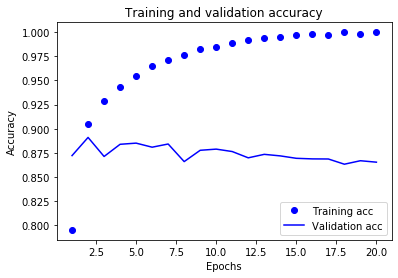

In [14]:
# 8. 绘制训练精度和验证精度：
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.plot(epochs, acc, 'bo', label="Training acc")
plt.plot(epochs, val_acc, 'b', label="Validation acc")
plt.legend()
# plt.show()

In [15]:
# 9. 根据训练/验证精度和训练/验证损失去修改epochs，然后从头开始训练模型：

# 由上面两个图可以看出，在第3轮训练之后产生过拟合：
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=3, batch_size=512)

Epoch 1/3


  512/25000 [..............................] - ETA: 13s - loss: 0.6932 - acc: 0.5117

 1536/25000 [>.............................] - ETA: 5s - loss: 0.6822 - acc: 0.5833 

 2560/25000 [==>...........................] - ETA: 3s - loss: 0.6727 - acc: 0.6023

 3584/25000 [===>..........................] - ETA: 2s - loss: 0.6611 - acc: 0.6364

 4608/25000 [====>.........................] - ETA: 2s - loss: 0.6507 - acc: 0.6599



 5632/25000 [=====>........................] - ETA: 2s - loss: 0.6364 - acc: 0.6870

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.6243 - acc: 0.7081

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.6135 - acc: 0.7217

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.6028 - acc: 0.7348

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.5916 - acc: 0.7477

10752/25000 [===========>..................] - ETA: 1s - loss: 0.5809 - acc: 0.7584

11776/25000 [=============>................] - ETA: 1s - loss: 0.5711 - acc: 0.7668

12800/25000 [==============>...............] - ETA: 1s - loss: 0.5618 - acc: 0.7745

13824/25000 [===============>..............] - ETA: 0s - loss: 0.5533 - acc: 0.7796

14848/25000 [================>.............] - ETA: 0s - loss: 0.5437 - acc: 0.7868

15872/25000 [==================>...........] - ETA: 0s - loss: 0.5346 - acc: 0.7925

16896/25000 [===================>..........] - ETA: 0s - loss: 0.5280 - acc: 0.7956

17920/25000 [====================>.........] - ETA: 0s - loss: 0.5194 - acc: 0.8010



18944/25000 [=====================>........] - ETA: 0s - loss: 0.5128 - acc: 0.8041

19968/25000 [======================>.......] - ETA: 0s - loss: 0.5063 - acc: 0.8066

20992/25000 [========================>.....] - ETA: 0s - loss: 0.5005 - acc: 0.8098

22016/25000 [=========================>....] - ETA: 0s - loss: 0.4946 - acc: 0.8121

23040/25000 [==========================>...] - ETA: 0s - loss: 0.4888 - acc: 0.8146

24064/25000 [===========================>..] - ETA: 0s - loss: 0.4816 - acc: 0.8189

25000/25000 [==============================] - 2s 81us/step - loss: 0.4759 - acc: 0.8217


Epoch 2/3


  512/25000 [..............................] - ETA: 2s - loss: 0.2891 - acc: 0.9297

 1536/25000 [>.............................] - ETA: 2s - loss: 0.2999 - acc: 0.9128



 2560/25000 [==>...........................] - ETA: 1s - loss: 0.2969 - acc: 0.9121

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.2933 - acc: 0.9143

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.2917 - acc: 0.9117

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.2938 - acc: 0.9110

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.2918 - acc: 0.9093

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.2874 - acc: 0.9104

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.2873 - acc: 0.9081

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.2830 - acc: 0.9102

10752/25000 [===========>..................] - ETA: 1s - loss: 0.2795 - acc: 0.9111

11776/25000 [=============>................] - ETA: 0s - loss: 0.2771 - acc: 0.9118

12800/25000 [==============>...............] - ETA: 0s - loss: 0.2766 - acc: 0.9115

13824/25000 [===============>..............] - ETA: 0s - loss: 0.2740 - acc: 0.9123

14848/25000 [================>.............] - ETA: 0s - loss: 0.2740 - acc: 0.9115

15872/25000 [==================>...........] - ETA: 0s - loss: 0.2719 - acc: 0.9122

16896/25000 [===================>..........] - ETA: 0s - loss: 0.2720 - acc: 0.9113

17920/25000 [====================>.........] - ETA: 0s - loss: 0.2712 - acc: 0.9107

18944/25000 [=====================>........] - ETA: 0s - loss: 0.2692 - acc: 0.9112

19968/25000 [======================>.......] - ETA: 0s - loss: 0.2684 - acc: 0.9111

20992/25000 [========================>.....] - ETA: 0s - loss: 0.2679 - acc: 0.9107

22016/25000 [=========================>....] - ETA: 0s - loss: 0.2678 - acc: 0.9102

23040/25000 [==========================>...] - ETA: 0s - loss: 0.2663 - acc: 0.9108

24064/25000 [===========================>..] - ETA: 0s - loss: 0.2650 - acc: 0.9106

25000/25000 [==============================] - 2s 72us/step - loss: 0.2649 - acc: 0.9101


Epoch 3/3
  512/25000 [..............................] - ETA: 1s - loss: 0.1986 - acc: 0.9434

 1536/25000 [>.............................] - ETA: 1s - loss: 0.1964 - acc: 0.9401

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.2029 - acc: 0.9340

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.1989 - acc: 0.9381

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.1987 - acc: 0.9373

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.2036 - acc: 0.9331

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.2031 - acc: 0.9334

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.2015 - acc: 0.9333

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.2009 - acc: 0.9322

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.2023 - acc: 0.9319

10752/25000 [===========>..................] - ETA: 1s - loss: 0.2059 - acc: 0.9296

11776/25000 [=============>................] - ETA: 0s - loss: 0.2032 - acc: 0.9314

12800/25000 [==============>...............] - ETA: 0s - loss: 0.2035 - acc: 0.9310

13824/25000 [===============>..............] - ETA: 0s - loss: 0.2025 - acc: 0.9314

14848/25000 [================>.............] - ETA: 0s - loss: 0.2036 - acc: 0.9311

15872/25000 [==================>...........] - ETA: 0s - loss: 0.2034 - acc: 0.9310

16896/25000 [===================>..........] - ETA: 0s - loss: 0.2034 - acc: 0.9304

17920/25000 [====================>.........] - ETA: 0s - loss: 0.2014 - acc: 0.9308

18432/25000 [=====================>........] - ETA: 0s - loss: 0.2013 - acc: 0.9306

19456/25000 [======================>.......] - ETA: 0s - loss: 0.2000 - acc: 0.9309



20480/25000 [=======================>......] - ETA: 0s - loss: 0.1990 - acc: 0.9309

21504/25000 [========================>.....] - ETA: 0s - loss: 0.1981 - acc: 0.9316

22016/25000 [=========================>....] - ETA: 0s - loss: 0.1977 - acc: 0.9313



23040/25000 [==========================>...] - ETA: 0s - loss: 0.1996 - acc: 0.9304



24064/25000 [===========================>..] - ETA: 0s - loss: 0.1997 - acc: 0.9303

25000/25000 [==============================] - 2s 74us/step - loss: 0.1986 - acc: 0.9303


In [16]:
# 10. 评估模型：
results = model.evaluate(x_test, y_test)
print(results)

   32/25000 [..............................] - ETA: 42s

  736/25000 [..............................] - ETA: 3s 

 1408/25000 [>.............................] - ETA: 2s

 2112/25000 [=>............................] - ETA: 2s

 2816/25000 [==>...........................] - ETA: 2s

 3488/25000 [===>..........................] - ETA: 1s

 4160/25000 [===>..........................] - ETA: 1s

 4832/25000 [====>.........................] - ETA: 1s

 5376/25000 [=====>........................] - ETA: 1s

 6048/25000 [======>.......................] - ETA: 1s

 6624/25000 [======>.......................] - ETA: 1s

 7264/25000 [=======>......................] - ETA: 1s

 8000/25000 [========>.....................] - ETA: 1s



 8768/25000 [=========>....................] - ETA: 1s

 9472/25000 [==========>...................] - ETA: 1s

10176/25000 [===========>..................] - ETA: 1s

10816/25000 [===========>..................] - ETA: 1s



11392/25000 [============>.................] - ETA: 1s

12032/25000 [=============>................] - ETA: 1s

12576/25000 [==============>...............] - ETA: 1s

13216/25000 [==============>...............] - ETA: 0s

13888/25000 [===============>..............] - ETA: 0s

14528/25000 [================>.............] - ETA: 0s

15072/25000 [=================>............] - ETA: 0s



15712/25000 [=================>............] - ETA: 0s

16352/25000 [==================>...........] - ETA: 0s

16960/25000 [===================>..........] - ETA: 0s

17664/25000 [====================>.........] - ETA: 0s



18336/25000 [=====================>........] - ETA: 0s

18848/25000 [=====================>........] - ETA: 0s

19392/25000 [======================>.......] - ETA: 0s

19968/25000 [======================>.......] - ETA: 0s

20512/25000 [=======================>......] - ETA: 0s

21088/25000 [========================>.....] - ETA: 0s

21760/25000 [=========================>....] - ETA: 0s

22272/25000 [=========================>....] - ETA: 0s

22752/25000 [==========================>...] - ETA: 0s

23264/25000 [==========================>...] - ETA: 0s



23712/25000 [===========================>..] - ETA: 0s

24160/25000 [===========================>..] - ETA: 0s

24608/25000 [============================>.] - ETA: 0s



25000/25000 [==============================] - 2s 85us/step


[0.2932908844089508, 0.88228]
